[View in Colaboratory](https://colab.research.google.com/github/nkcr/WEM-labs/blob/master/visualization/Visualization.ipynb)

# Visualization

Set the mongoDB configuration URL. DO NOT LEAVE IT HERE FOR GIT *VERSIONING*


In [0]:
MD="???"

## Installation and dependencies

In [15]:
# Install Graphviz
! pip install graphviz
! apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


## Fake data

In [0]:
data = {
    "201801-201802": [
        ["cheval", "chien", "fourmis"],
        ["bateau", "avion", "train"]
    ],
    "201802-201803": [
        ["clavier", "souris", "ram"],
        ["france", "suisse", "italie"]
    ],
    "201804-201805": [
        ["lettre", "chiffre", "alphabet"],
        ["table", "chaise", "fauteil"]
    ],
    "201803-201804": [
        ["cable", "adaptateur", "ipod"],
        ["rail", "coke", "tabac"]
    ]
}

In [4]:
print(data)

{'201801-201802': [['cheval', 'chien', 'fourmis'], ['bateau', 'avion', 'train']], '201802-201803': [['clavier', 'souris', 'ram'], ['france', 'suisse', 'italie']], '201804-201805': [['lettre', 'chiffre', 'alphabet'], ['table', 'chaise', 'fauteil']], '201803-201804': [['cable', 'adaptateur', 'ipod'], ['rail', 'coke', 'tabac']]}


## Visu with fake data, just to try

1
2
2
3
3
4
4
5


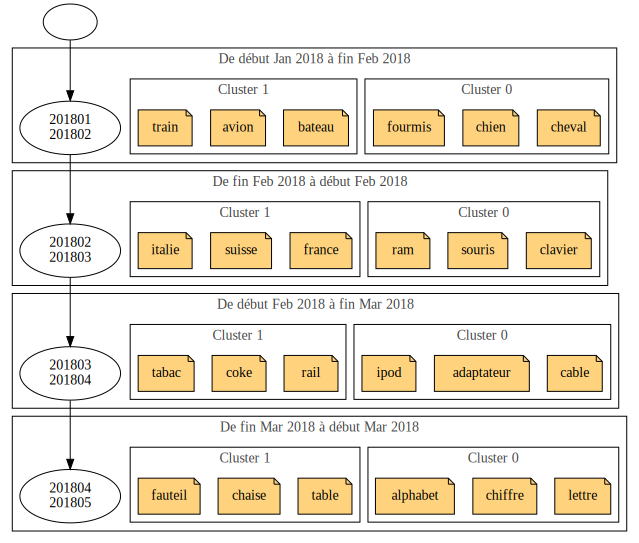

In [13]:
from graphviz import Digraph

import operator
import uuid
import calendar

def niceDate(key):
  date1, date2 = key.split("-")
  month1_num = int(date1[-2:])
  print(month1_num)
  month1_abbr = calendar.month_abbr[month1_num//2+1]
  if month1_num%2 == 0:
    month1 = "fin {}".format(month1_abbr)
  else:
    month1 = "début {}".format(month1_abbr)
  month2_num = int(date2[-2:])
  print(month2_num)
  month2_abbr = calendar.month_abbr[month2_num//2+1]
  if month2_num%2 == 0:
    month2 = "fin {}".format(month2_abbr)
  else:
    month2 = "début {}".format(month2_abbr)
  
  return "De {} {} à {} {}".format(month1, date1[:4], month2, date2[:4])

# Create a list with tuples (key, value)
sorted_events = sorted(data.items(), key=operator.itemgetter(0))

g = Digraph('G', filename='angles.gv')
g.attr(bgcolor='#ffffff')
g.attr(fontcolor='#444444')
g.attr(compound='true')
past_key = ""

for key, epoch in sorted_events:
  #
  # Epoch
  #
  with g.subgraph(name='cluster_{}'.format(key)) as c:
    c.attr('node', shape='box', style='filled', fillcolor='#FFD37E', 
           label=key, fontcolor='black')
    for i, cluster in enumerate(epoch):
      #
      # Cluster
      #
      with c.subgraph(name='cluster_{}_{}'.format(key,i)) as ci:
        c.attr('node', shape='note', style='filled', fillcolor='#FFD37E', 
               label=key, fontcolor='black')
        for word in cluster:
          #
          # Word
          #
          ci.attr('node', label=word)
          ci.node('n%s:%d:%s' % (key,i,word))
          #
        ci.attr(label="Cluster %d" %i)
      #
    c.node(key, label="\n".join(key.split("-")))
    g.edge(past_key, key)
    past_key = key
    c.attr(label=niceDate(key))
  #
g

#niceDate("20180001-201810")

## Get real data

### Install pymongo and set DB connection

In [4]:
!pip install pymongo

from pymongo import MongoClient
client = MongoClient(MD)

In [0]:
corpus = client.corpus
topics = corpus.topicAnalysis.find_one({"id": "resultDict2"})["topics"]

In [14]:
print(len(topics))

448


In [21]:
from graphviz import Digraph

import operator
import uuid
import calendar

def niceDate(key):
  date1, date2 = key.split("-")
  month1_num = int(date1[-2:])
  month1_abbr = calendar.month_abbr[(month1_num+1)//2]
  if month1_num%2 == 0:
    month1 = "fin {}".format(month1_abbr)
  else:
    month1 = "début {}".format(month1_abbr)
  month2_num = int(date2[-2:])
  month2_abbr = calendar.month_abbr[(month2_num+1)//2]
  if month2_num%2 == 0:
    month2 = "fin {}".format(month2_abbr)
  else:
    month2 = "début {}".format(month2_abbr)
  
  return "De {} {} à {} {}".format(month1, date1[:4], month2, date2[:4])

# Create a list with tuples (key, value)
sorted_topics = sorted(topics.items(), key=operator.itemgetter(0))

g = Digraph('G', filename='angles.gv')
g.attr(bgcolor='#ffffff')
g.attr(fontcolor='#444444')
g.attr(compound='true')
past_key = ""

for key, epoch in sorted_topics:
  #
  # Epoch
  #
  with g.subgraph(name='cluster_{}'.format(key)) as c:
    c.attr('node', shape='box', style='filled', fillcolor='#FFD37E', 
           label=key, fontcolor='black')
    for i, cluster in enumerate(epoch):
      #
      # Cluster
      #
      with c.subgraph(name='cluster_{}_{}'.format(key,i)) as ci:
        c.attr('node', shape='plaintext', style='filled', fillcolor='#FFD37E', 
               label=key, fontcolor='black')
        words = " \n ".join(cluster)
        ci.attr('node', label=words)
        ci.node('n%s:%d:%s' % (key,i,words))
        ci.attr(label="Cluster %d" %i)
      #
    c.node(key, label="\n".join(key.split("-")))
    g.edge(past_key, key)
    past_key = key
    c.attr(label=niceDate(key))
  #
g

#niceDate("20180001-201810")